In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Count of Job Titles

In [9]:
df.pivot_table(index='job_country',columns='job_title_short', values='salary_year_avg', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


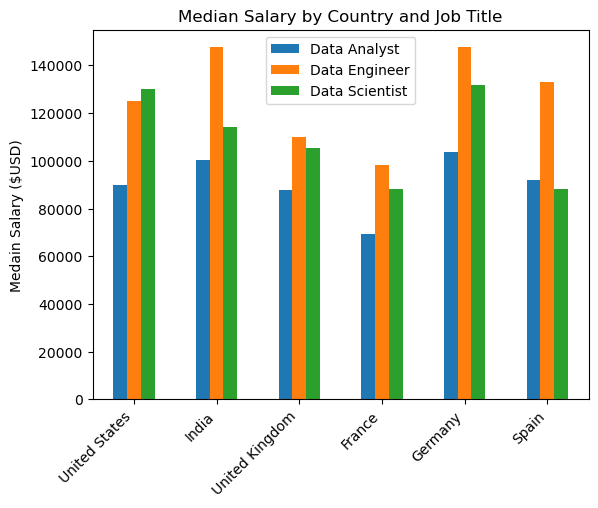

In [27]:
top_countries = df['job_country'].value_counts().head(6).index
df_job_country_salary = df.pivot_table(
    index='job_country',
    columns='job_title_short', 
    values='salary_year_avg', 
    aggfunc='median'
    )
#df_job_country_salary = df_job_country_salary[df_job_country_salary['job_country'] == top_countries]#this does not work because the number of rows are not equal as top_countries have only 6 rows

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary.loc[top_countries, job_titles]

df_job_country_salary.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Medain Salary ($USD)')
plt.title('Median Salary by Country and Job Title')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

# 𝕙𝕠𝕞𝕖𝕨𝕠𝕣𝕜

# 🟩 Count Job Postings by Title and Country (2.4.1)

In [58]:
df_job_country_count = df.pivot_table(index='job_country', columns='job_title_short', values='salary_year_avg', aggfunc='size')
df_job_country_count

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,4.0,NaN,9.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
Albania,11.0,1.0,36.0,30.0,12.0,4.0,2.0,6.0,11.0,6.0
Algeria,21.0,5.0,22.0,21.0,27.0,2.0,NaN,1.0,NaN,12.0
Angola,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0
Argentina,453.0,322.0,1273.0,2265.0,1617.0,287.0,255.0,647.0,350.0,1267.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.0,2.0,16.0,19.0,9.0,4.0,4.0,4.0,3.0,6.0
Vietnam,91.0,70.0,334.0,768.0,375.0,115.0,71.0,220.0,91.0,279.0
Yemen,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


# 🟨 Salary Stats by Job Title (2.4.2)

In [67]:
# df_job_country_count = df.groupby('job_title_short')['salary_year_avg'].agg('mean')
# df_job_country_count
df_job_country_count = df.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc='mean')
df_job_country_count

,salary_year_avg
job_title_short,
Business Analyst,91082.612833
Cloud Engineer,111268.453846
Data Analyst,93841.907854
Data Engineer,130125.604250
Data Scientist,135988.837171
Machine Learning Engineer,126774.315972
Senior Data Analyst,113911.363665
Senior Data Engineer,145840.611624
Senior Data Scientist,154206.292996


# 🟥 Sum Salary by Title and Country (2.4.3)

In [68]:
df.pivot_table(index='job_country', values='salary_year_avg', columns='job_title_short', aggfunc='sum')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
Albania,0.0,0.0,99900.0,0.0,139962.5,0.0,0.0,0.0,157500.0,0.0
Algeria,0.0,0.0,44100.0,45000.0,0.0,0.0,NaN,0.0,NaN,0.0
Angola,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0
Argentina,142200.0,197500.0,341745.5,1225599.0,597221.5,393029.0,0.0,295000.0,0.0,174500.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,223200.0,0.0,999267.0,1576131.0,534400.0,571050.0,402050.0,508500.0,79200.0,107200.0
Yemen,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
